## CIFAR10 small images classification By Alan Altonchi
**Day 3 of learning how to use TensorFlow and what Machine Learning is**

Dataset: https://keras.io/api/datasets/cifar10/

This is a **Multi-Class Classification**, the inputs are 32x32 color images, the output is what the model predicts the image to be which can be anything between `0` and `9`

`0`	airplane

`1`	automobile

`2`	bird

`3`	cat

`4`	deer

`5`	dog

`6`	frog

`7`	horse

`8`	ship

`9`	truck

**Introduction:** Hello, my name is Alan, I am a passionate self-taught programmer that loves learning new things. This is my journey as I'm learning about **Machine Learning** and how to make use of its subfield **Deep Learning**. I will do so by learning how to use **TensorFlow** from scratch.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, losses, optimizers, callbacks, layers
import matplotlib.pyplot as plt
import random
import pandas as pd

## Helpful Functions

In [28]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    cm = confusion_matrix(y_true, y_pred) 
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshhold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshhold else "black",
                size=text_size)

## Gather data

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

## Structure the data

In [3]:
train_data, test_data = tf.constant(train_data), tf.constant(test_data)
train_labels, test_labels = tf.squeeze(train_labels), tf.squeeze(test_labels)

In [4]:
class_names = ['airplane',
    'automobile',
    'bird',
    'cat',
	'deer',
	'dog',
	'frog',
	'horse',
	'ship',
	'truck']

## Understand the data

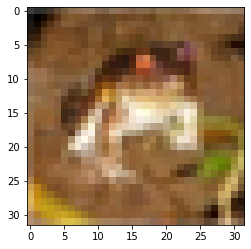

In [5]:
plt.imshow(train_data[0])

In [6]:
class_names[train_labels[0]]

'frog'

In [7]:
train_data[0].shape, train_labels[0].shape

(TensorShape([32, 32, 3]), TensorShape([]))

## Normalize the data

In [8]:
train_data[0].numpy().max()

255

In [9]:
train_data = tf.cast(train_data,tf.dtypes.float32) / 255.0
test_data = tf.cast(test_data,tf.dtypes.float32) / 255.0

In [10]:
train_data[0][:5]

<tf.Tensor: shape=(5, 32, 3), dtype=float32, numpy=
array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        [0.26666668, 0.21176471, 0.16470589],
        [0.38431373, 0.28627452, 0.20392157],
        [0.46666667, 0.35686275, 0.24705882],
        [0.54509807, 0.41960785, 0.29411766],
        [0.5686275 , 0.43137255, 0.3137255 ],
        [0.58431375, 0.45882353, 0.34901962],
        [0.58431375, 0.47058824, 0.3647059 ],
        [0.5137255 , 0.40392157, 0.3019608 ],
        [0.49019608, 0.3882353 , 0.29803923],
        [0.5568628 , 0.4509804 , 0.35686275],
        [0.5647059 , 0.4392157 , 0.3372549 ],
        [0.5372549 , 0.4117647 , 0.30980393],
        [0.5058824 , 0.38039216, 0.2784314 ],
        [0.5372549 , 0.41568628, 0.30980393],
        [0.5254902 , 0.41568628, 0.29803923],
        [0.4862745 , 0.38039216, 0.2509804 ],
        [0.54509807, 0.44313726, 0.30588236],
        [0.54509807, 0.43921

## Create the model

In [24]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
              metrics='accuracy')

In [26]:
history = model.fit(train_data, 
                    train_labels, 
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4952 - accuracy: 0.8332 - val_loss: 0.9866 - val_accuracy: 0.6798
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4318 - accuracy: 0.8541 - val_loss: 1.0329 - val_accuracy: 0.6749
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8805 - val_loss: 1.0696 - val_accuracy: 0.6749
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.9001 - val_loss: 1.1181 - val_accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2459 - accuracy: 0.9229 - val_loss: 1.1934 - val_accuracy: 0.6757
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1947 - accuracy: 0.9412 - val_loss: 1.3105 - val_accuracy: 0.6731
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1529 - accuracy: 0.9556 - val_loss: 1.3181 - val_accuracy:

In [27]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 1.6593 - accuracy: 0.6729


[1.6592597961425781, 0.6729000210762024]

I cannot reach over 67% accuracy, further experimentation required...

## Confusion Matrix

313/313 [==============================] - 0s 1ms/step


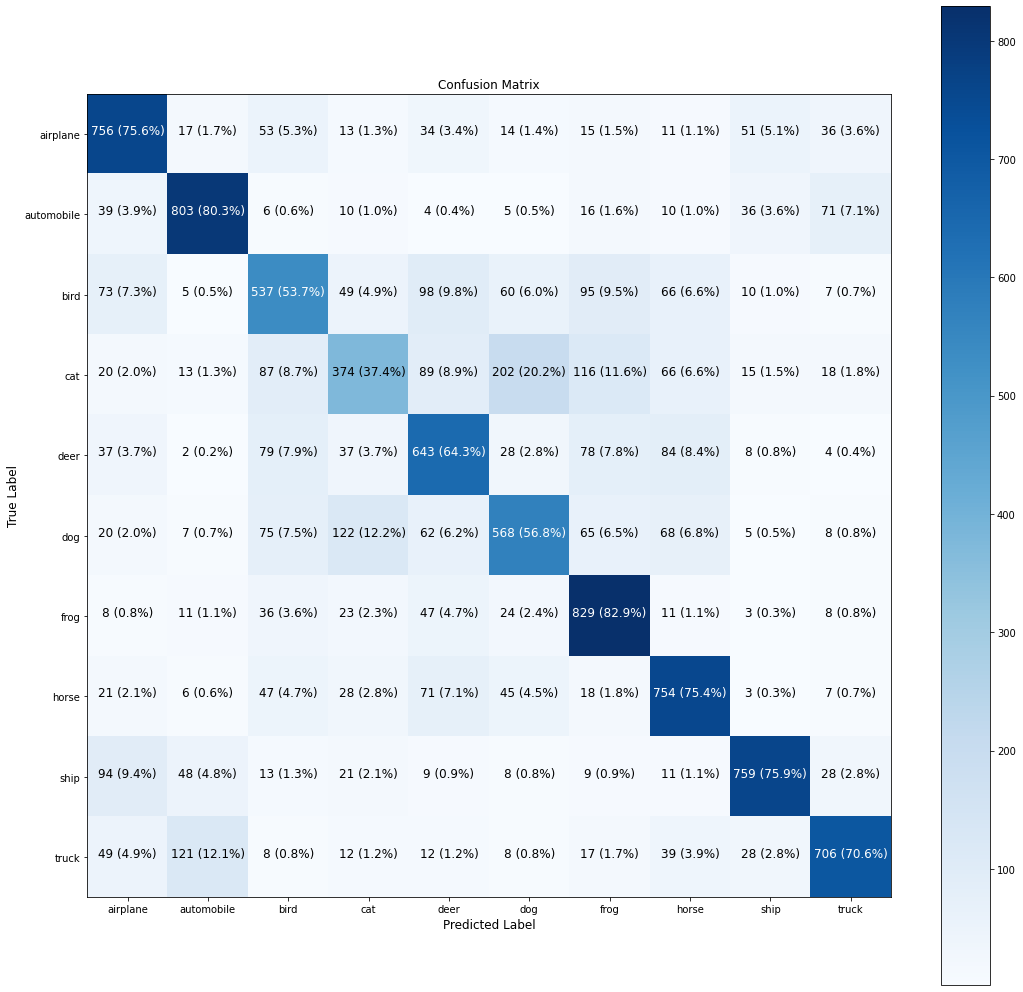

In [34]:
pred = model.predict(test_data)
y_pred = tf.argmax(pred,axis=1)
make_confusion_matrix(test_labels, y_pred, class_names,figsize=(18,18),text_size=12)